<a href="https://colab.research.google.com/github/omergunal23/DecisionTree_BanknoteAuthentication/blob/main/DecisionTree_BanknoteAuthentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Loading and Visualizing the dataset

In [ ]:
# Necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# since dataset, .txt file, is seperated by comas same logic as in the case of .csv file
df = pd.read_csv('/content/data_banknote_authentication.txt', header=None)

# I added feature names to first row as header since the actual dataset doesn't have
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# save it .csv file
df.to_csv("data_banknote_authentication.csv", index=False)

df[0:5]

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df[762:767] # to see both class label results

,variance,skewness,curtosis,entropy,class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1


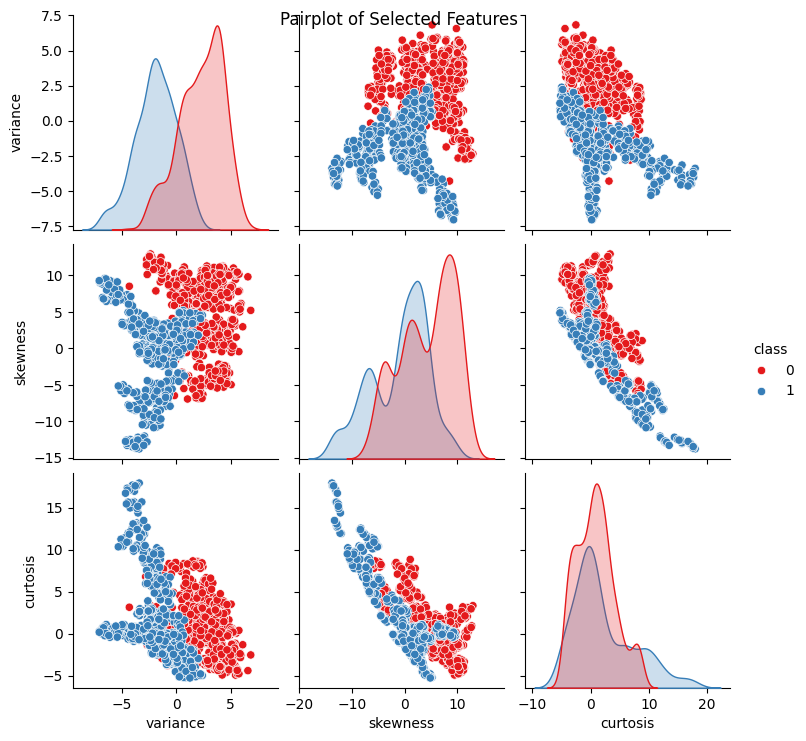

In [ ]:
# pairwise plots for the features
selected_features = ['variance', 'skewness', 'curtosis', 'class']
sns.pairplot(df[selected_features], hue='class', palette='Set1')
plt.suptitle("Pairplot of Selected Features")
plt.show()

Decision Tree Algorithm

In [ ]:
# Inputs and Outputs are seperated
X = df.drop("class", axis=1)
y = df["class"]

# 80%-20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classification with different parameters
for criterion in ["gini", "entropy"]:
  print(f"Decision Tree Classification with criterion: {criterion}")
  for min_samples_split in [2, 3, 4, 10]:
      print(f"Min Samples needed for splitting: {min_samples_split}")
      for max_depth in [4, 5, 6, 7, 10]:
          print(f"Max Depth of the Decision Tree: {max_depth}")
          DTclassification = DecisionTreeClassifier(max_depth= max_depth, min_samples_split= min_samples_split, criterion = criterion, random_state=42)

          # Training the model
          DTclassification.fit(X_train, y_train)

          # Testing the model
          y_pred = DTclassification.predict(X_test)

          # Classification Report
          print(classification_report(y_test, y_pred))

          # Confusion matrix
          #ConfusionMatrixDisplay.from_estimator(DTclassification, X_test, y_test, cmap="Blues")
          #plt.title("Confusion Matrix")
          #plt.show()

Decision Tree Classification with criterion: gini
Min Samples needed for splitting: 2
Max Depth of the Decision Tree: 4
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.94      0.92      0.93       127

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275

Max Depth of the Decision Tree: 5
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.93      0.96       127

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.97       275
weighted avg       0.97      0.97      0.97       275

Max Depth of the Decision Tree: 6
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       148
           1       1.00      0.95      0.98      

Importance of depth in Decision Tree

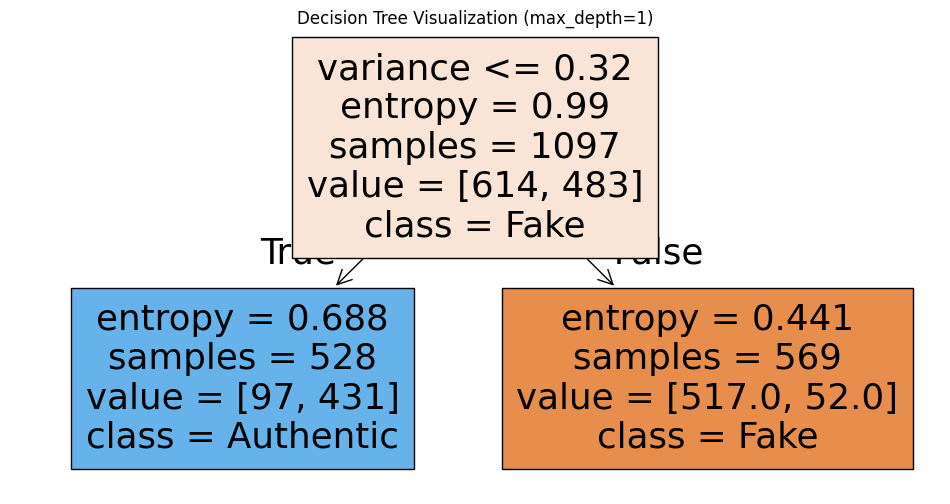

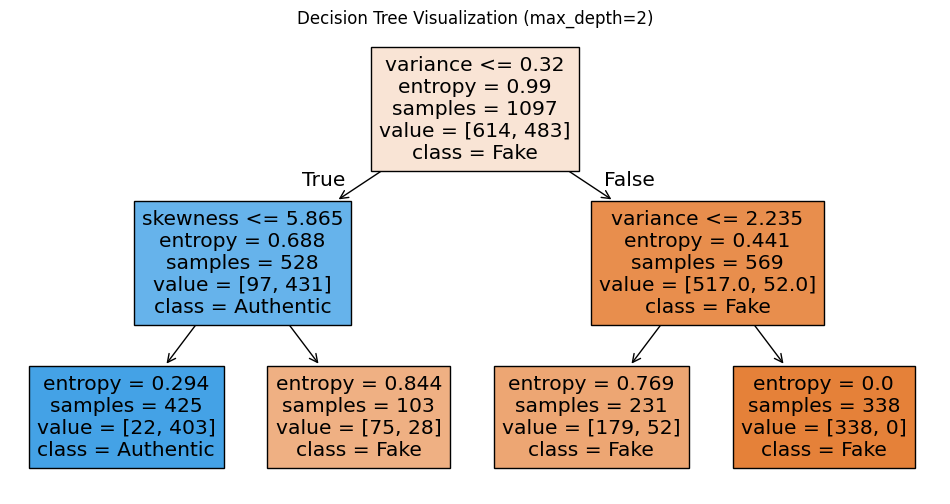

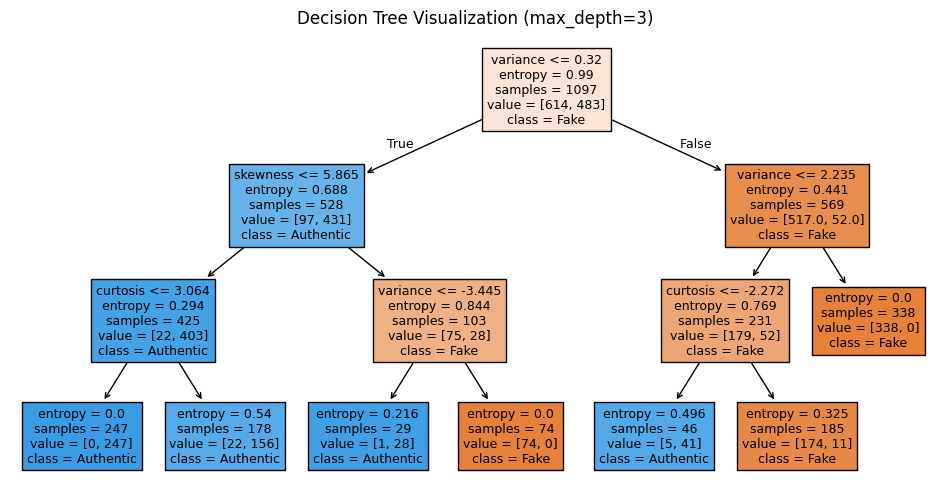

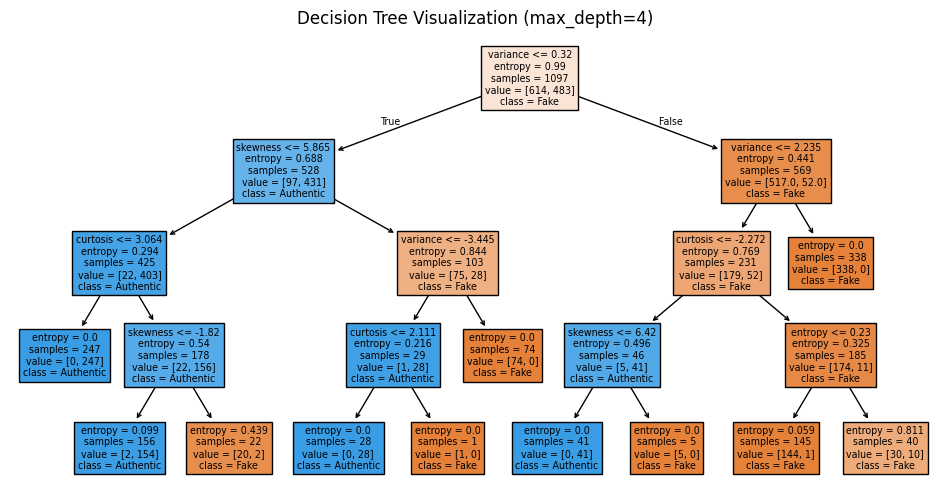

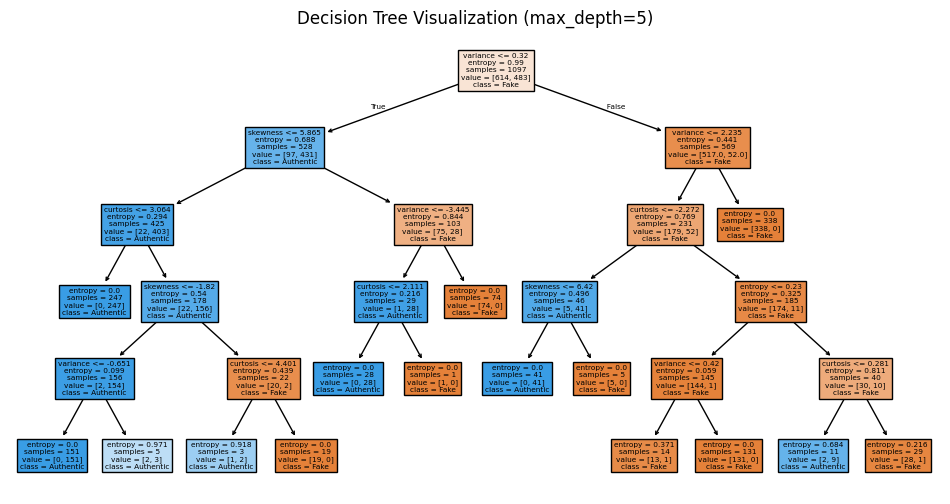

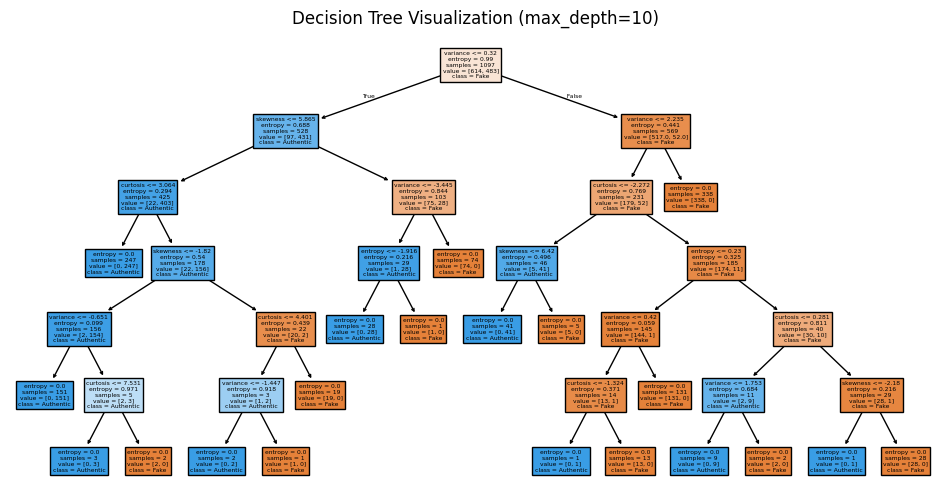

In [ ]:
for max_depth in [1, 2, 3, 4, 5, 10]:
    DTclassification = DecisionTreeClassifier(max_depth= max_depth, min_samples_split=3,  criterion= "entropy",random_state=42) # other parameters are selected as the optimum
    DTclassification.fit(X_train, y_train)

    plt.figure(figsize=(12, 6))
    plot_tree(DTclassification, feature_names=X.columns, class_names=["Fake", "Authentic"], filled=True)
    plt.title(f"Decision Tree Visualization (max_depth={max_depth})")
    plt.show()

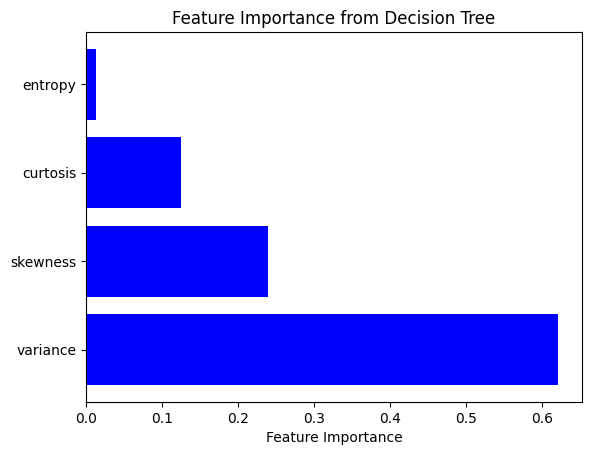

In [ ]:
# Feature Importance
importances = DTclassification.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances, color="blue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Decision Tree")
plt.show()